In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv("../data/raw/detailed_ev_charging_stations.csv")

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())


Dataset Shape: (5000, 17)

Column Names:
['Station ID', 'Latitude', 'Longitude', 'Address', 'Charger Type', 'Cost (USD/kWh)', 'Availability', 'Distance to City (km)', 'Usage Stats (avg users/day)', 'Station Operator', 'Charging Capacity (kW)', 'Connector Types', 'Installation Year', 'Renewable Energy Source', 'Reviews (Rating)', 'Parking Spots', 'Maintenance Frequency']


In [2]:
# Basic info
print("Dataset Info:")
df.info()

print("\nFirst few rows:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year            5000 non-null   int64  
 13  Rene

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [5]:
# Geographic distribution
print("Geographic Analysis:")
print(f"Latitude range: {df['Latitude'].min():.2f} to {df['Latitude'].max():.2f}")
print(f"Longitude range: {df['Longitude'].min():.2f} to {df['Longitude'].max():.2f}")

# Plot geographic distribution
fig = px.scatter_map(df, 
                        lat="Latitude", 
                        lon="Longitude",
                        hover_data=["Station ID", "Charger Type", "Cost (USD/kWh)","Address"],
                        color="Charger Type",
                        size="Charging Capacity (kW)",
                        zoom=1,
                        height=600,
                        title="EV Charging Stations Geographic Distribution")
fig.update_layout(mapbox_style="open-street-map")
fig.show()


Geographic Analysis:
Latitude range: -89.68 to 89.46
Longitude range: -178.87 to 179.66


Charger Type Distribution:
Charger Type
AC Level 2         1764
AC Level 1         1638
DC Fast Charger    1598
Name: count, dtype: int64


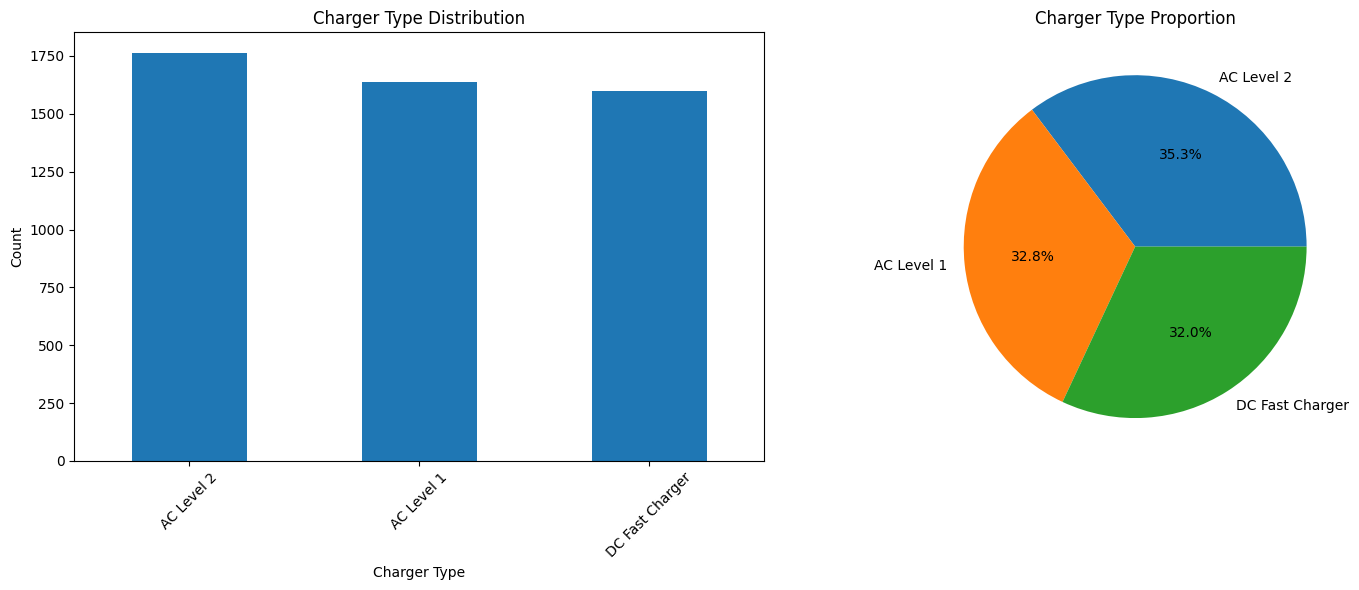

In [6]:
# Charger type analysis
print("Charger Type Distribution:")
charger_counts = df['Charger Type'].value_counts()
print(charger_counts)

# Visualize charger types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
charger_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Charger Type Distribution')
ax1.set_xlabel('Charger Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(charger_counts.values, labels=charger_counts.index, autopct='%1.1f%%')
ax2.set_title('Charger Type Proportion')

plt.tight_layout()
plt.show()


Charging Capacity Analysis:
count    5000.000000
mean      144.272000
std       128.370674
min        22.000000
25%        50.000000
50%       150.000000
75%       350.000000
max       350.000000
Name: Charging Capacity (kW), dtype: float64

Unique charging capacities: [np.int64(22), np.int64(50), np.int64(150), np.int64(350)]


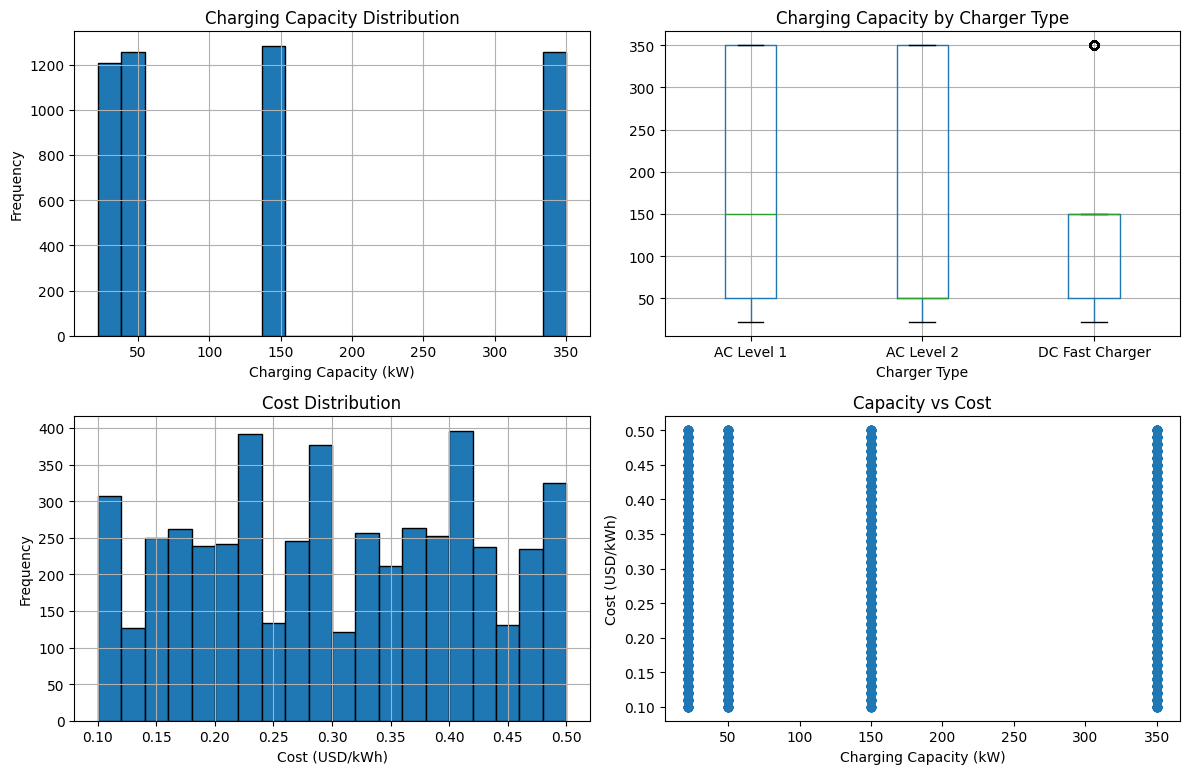

In [7]:
# Charging capacity analysis
print("Charging Capacity Analysis:")
print(df['Charging Capacity (kW)'].describe())

# Check for inconsistencies
print(f"\nUnique charging capacities: {sorted(df['Charging Capacity (kW)'].unique())}")

# Visualize capacity distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['Charging Capacity (kW)'].hist(bins=20, edgecolor='black')
plt.title('Charging Capacity Distribution')
plt.xlabel('Charging Capacity (kW)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df.boxplot(column='Charging Capacity (kW)', by='Charger Type', ax=plt.gca())
plt.title('Charging Capacity by Charger Type')
plt.suptitle('')

plt.subplot(2, 2, 3)
df['Cost (USD/kWh)'].hist(bins=20, edgecolor='black')
plt.title('Cost Distribution')
plt.xlabel('Cost (USD/kWh)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.scatter(df['Charging Capacity (kW)'], df['Cost (USD/kWh)'], alpha=0.6)
plt.title('Capacity vs Cost')
plt.xlabel('Charging Capacity (kW)')
plt.ylabel('Cost (USD/kWh)')

plt.tight_layout()
plt.show()


In [8]:
# Availability analysis
print("Availability Patterns:")
availability_patterns = df['Availability'].value_counts()
print(availability_patterns.head(10))

# Parse availability to understand operating hours
def parse_availability(availability_str):
    if pd.isna(availability_str):
        return 'Unknown'
    elif '24/7' in str(availability_str):
        return '24/7'
    elif '-' in str(availability_str):
        return 'Limited Hours'
    else:
        return 'Other'

df['Availability_Category'] = df['Availability'].apply(parse_availability)
print("\nAvailability Categories:")
print(df['Availability_Category'].value_counts())


Availability Patterns:
Availability
24/7          1681
6:00-22:00    1673
9:00-18:00    1646
Name: count, dtype: int64

Availability Categories:
Availability_Category
Limited Hours    3319
24/7             1681
Name: count, dtype: int64


Usage Statistics:
count    5000.000000
mean       55.453800
std        26.494986
min        10.000000
25%        32.000000
50%        56.000000
75%        79.000000
max       100.000000
Name: Usage Stats (avg users/day), dtype: float64


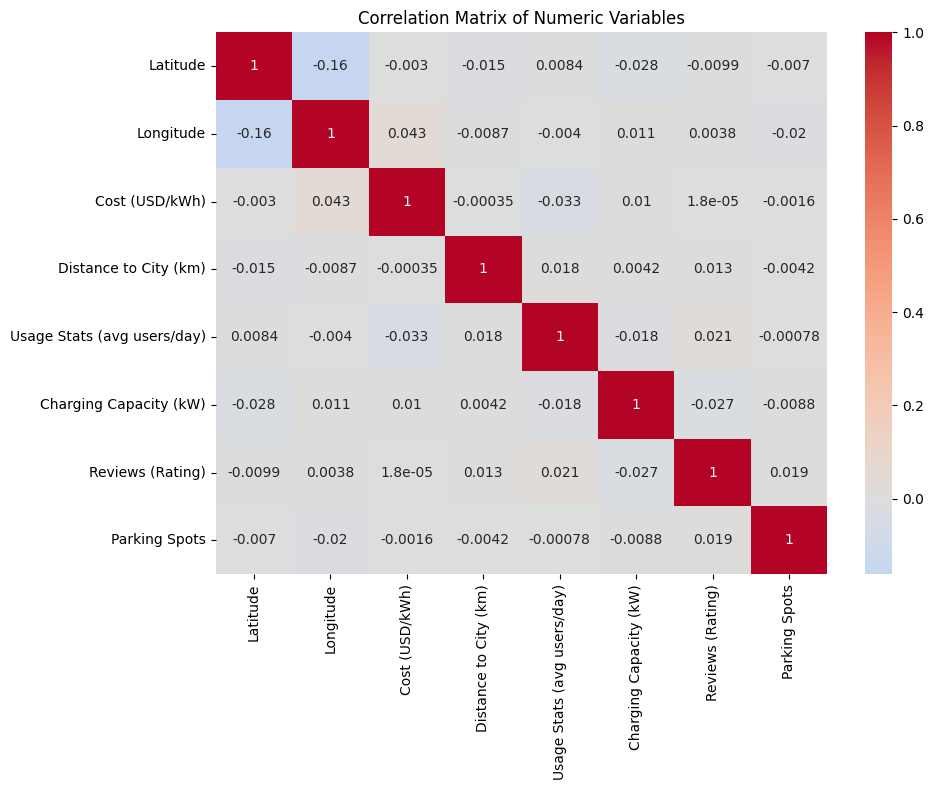

In [9]:
# Usage statistics analysis
print("Usage Statistics:")
print(df['Usage Stats (avg users/day)'].describe())

# Correlation analysis
numeric_cols = ['Latitude', 'Longitude', 'Cost (USD/kWh)', 'Distance to City (km)', 
                'Usage Stats (avg users/day)', 'Charging Capacity (kW)', 'Reviews (Rating)', 
                'Parking Spots']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()


In [10]:
# Data quality issues identification
print("Data Quality Issues:")

# Check for duplicate stations
duplicates = df.duplicated(subset=['Latitude', 'Longitude'], keep=False)
print(f"Potential duplicate locations: {duplicates.sum()}")

# Check for unrealistic values
print(f"Charging capacity > 500kW: {(df['Charging Capacity (kW)'] > 500).sum()}")
print(f"Cost > $1/kWh: {(df['Cost (USD/kWh)'] > 1.0).sum()}")
print(f"Usage > 200 users/day: {(df['Usage Stats (avg users/day)'] > 200).sum()}")
print(f"Rating > 5.0: {(df['Reviews (Rating)'] > 5.0).sum()}")

# Geographic outliers
print(f"Stations outside typical ranges:")
print(f"  Latitude < -60 or > 70: {((df['Latitude'] < -60) | (df['Latitude'] > 70)).sum()}")
print(f"  Longitude < -180 or > 180: {((df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()}")


Data Quality Issues:
Potential duplicate locations: 0
Charging capacity > 500kW: 0
Cost > $1/kWh: 0
Usage > 200 users/day: 0
Rating > 5.0: 0
Stations outside typical ranges:
  Latitude < -60 or > 70: 144
  Longitude < -180 or > 180: 0


In [ ]:
# Data quality issues identification
print("Data Quality Issues:")

# Check for duplicate stations
duplicates = df.duplicated(subset=['Latitude', 'Longitude'], keep=False)
print(f"Potential duplicate locations: {duplicates.sum()}")

# Check for unrealistic values
print(f"Charging capacity > 500kW: {(df['Charging Capacity (kW)'] > 500).sum()}")
print(f"Cost > $1/kWh: {(df['Cost (USD/kWh)'] > 1.0).sum()}")
print(f"Usage > 200 users/day: {(df['Usage Stats (avg users/day)'] > 200).sum()}")
print(f"Rating > 5.0: {(df['Reviews (Rating)'] > 5.0).sum()}")

# Geographic outliers
print(f"Stations outside typical ranges:")
print(f"  Latitude < -60 or > 70: {((df['Latitude'] < -60) | (df['Latitude'] > 70)).sum()}")
print(f"  Longitude < -180 or > 180: {((df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()}")


Data Quality Issues:
Potential duplicate locations: 0
Charging capacity > 500kW: 0
Cost > $1/kWh: 0
Usage > 200 users/day: 0
Rating > 5.0: 0
Stations outside typical ranges:
  Latitude < -60 or > 70: 144
  Longitude < -180 or > 180: 0


In [ ]:
# Data quality issues identification
print("Data Quality Issues:")

# Check for duplicate stations
duplicates = df.duplicated(subset=['Latitude', 'Longitude'], keep=False)
print(f"Potential duplicate locations: {duplicates.sum()}")

# Check for unrealistic values
print(f"Charging capacity > 500kW: {(df['Charging Capacity (kW)'] > 500).sum()}")
print(f"Cost > $1/kWh: {(df['Cost (USD/kWh)'] > 1.0).sum()}")
print(f"Usage > 200 users/day: {(df['Usage Stats (avg users/day)'] > 200).sum()}")
print(f"Rating > 5.0: {(df['Reviews (Rating)'] > 5.0).sum()}")

# Geographic outliers
print(f"Stations outside typical ranges:")
print(f"  Latitude < -60 or > 70: {((df['Latitude'] < -60) | (df['Latitude'] > 70)).sum()}")
print(f"  Longitude < -180 or > 180: {((df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()}")


Data Quality Issues:
Potential duplicate locations: 0
Charging capacity > 500kW: 0
Cost > $1/kWh: 0
Usage > 200 users/day: 0
Rating > 5.0: 0
Stations outside typical ranges:
  Latitude < -60 or > 70: 144
  Longitude < -180 or > 180: 0


In [ ]:
# Data quality issues identification
print("Data Quality Issues:")

# Check for duplicate stations
duplicates = df.duplicated(subset=['Latitude', 'Longitude'], keep=False)
print(f"Potential duplicate locations: {duplicates.sum()}")

# Check for unrealistic values
print(f"Charging capacity > 500kW: {(df['Charging Capacity (kW)'] > 500).sum()}")
print(f"Cost > $1/kWh: {(df['Cost (USD/kWh)'] > 1.0).sum()}")
print(f"Usage > 200 users/day: {(df['Usage Stats (avg users/day)'] > 200).sum()}")
print(f"Rating > 5.0: {(df['Reviews (Rating)'] > 5.0).sum()}")

# Geographic outliers
print(f"Stations outside typical ranges:")
print(f"  Latitude < -60 or > 70: {((df['Latitude'] < -60) | (df['Latitude'] > 70)).sum()}")
print(f"  Longitude < -180 or > 180: {((df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()}")


Data Quality Issues:
Potential duplicate locations: 0
Charging capacity > 500kW: 0
Cost > $1/kWh: 0
Usage > 200 users/day: 0
Rating > 5.0: 0
Stations outside typical ranges:
  Latitude < -60 or > 70: 144
  Longitude < -180 or > 180: 0


In [ ]:
# Data quality issues identification
print("Data Quality Issues:")

# Check for duplicate stations
duplicates = df.duplicated(subset=['Latitude', 'Longitude'], keep=False)
print(f"Potential duplicate locations: {duplicates.sum()}")

# Check for unrealistic values
print(f"Charging capacity > 500kW: {(df['Charging Capacity (kW)'] > 500).sum()}")
print(f"Cost > $1/kWh: {(df['Cost (USD/kWh)'] > 1.0).sum()}")
print(f"Usage > 200 users/day: {(df['Usage Stats (avg users/day)'] > 200).sum()}")
print(f"Rating > 5.0: {(df['Reviews (Rating)'] > 5.0).sum()}")

# Geographic outliers
print(f"Stations outside typical ranges:")
print(f"  Latitude < -60 or > 70: {((df['Latitude'] < -60) | (df['Latitude'] > 70)).sum()}")
print(f"  Longitude < -180 or > 180: {((df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()}")


Data Quality Issues:
Potential duplicate locations: 0
Charging capacity > 500kW: 0
Cost > $1/kWh: 0
Usage > 200 users/day: 0
Rating > 5.0: 0
Stations outside typical ranges:
  Latitude < -60 or > 70: 144
  Longitude < -180 or > 180: 0
